In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
AirB=pd.read_csv("AB_NYC_2019.csv")
AirB.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,19-10-2018,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,21-05-2019,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,05-07-2019,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,19-11-2018,0.10,1,0


In [3]:
AirB.shape

(48895, 16)

In [4]:
AirB.dtypes

id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group                object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object

In [5]:
AirB.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


In [6]:
AirB.isnull().sum()
## Null Values

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [7]:
(AirB.isnull().sum()/len(AirB))*100
## Null Values Percentage

id                                 0.000000
name                               0.032723
host_id                            0.000000
host_name                          0.042949
neighbourhood_group                0.000000
neighbourhood                      0.000000
latitude                           0.000000
longitude                          0.000000
room_type                          0.000000
price                              0.000000
minimum_nights                     0.000000
number_of_reviews                  0.000000
last_review                       20.558339
reviews_per_month                 20.558339
calculated_host_listings_count     0.000000
availability_365                   0.000000
dtype: float64

* Same number of missing values in "last_review" and "reviews_per_month" 
* Meaning, where "last_review" is null, 0 reviews were given.
* Let's replace reviews_per_month's null values wih 0

In [8]:
AirB["reviews_per_month"]=AirB["reviews_per_month"].fillna(0)

In [9]:
AirB["reviews_per_month"].isna().sum()
## Checking if null values present

0

In [10]:
AirB.dtypes
## Identifying Numerical column to detect outliers

id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group                object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object

#  Checking Outliers

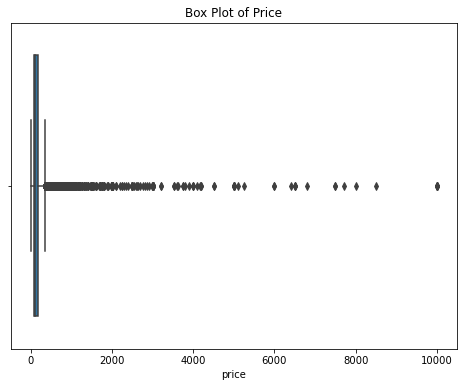

In [11]:
# Set the figure size
plt.figure(figsize=(8, 6))

# Plot a box plot
sns.boxplot(AirB['price'])

# Add labels and title

plt.title('Box Plot of Price')

# Show the plot
plt.show()

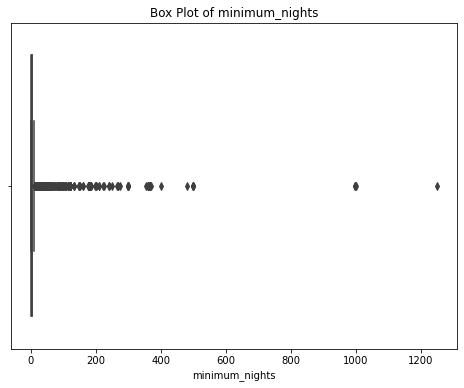

In [12]:
# Set the figure size
plt.figure(figsize=(8, 6))

# Plot a box plot
sns.boxplot(AirB['minimum_nights'])

# Add labels and title

plt.title('Box Plot of minimum_nights')

# Show the plot
plt.show()

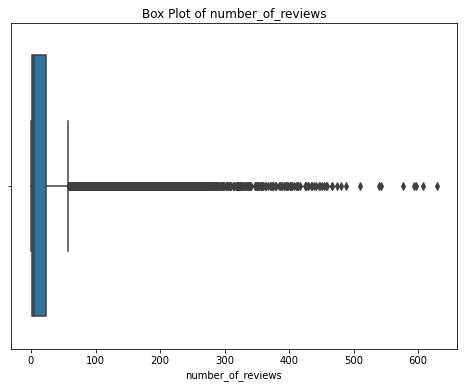

In [13]:
# Set the figure size
plt.figure(figsize=(8, 6))

# Plot a box plot
sns.boxplot(AirB['number_of_reviews'])

# Add labels and title

plt.title('Box Plot of number_of_reviews')

# Show the plot
plt.show()

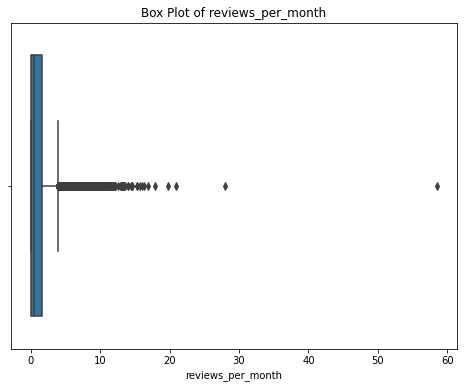

In [14]:
# Set the figure size
plt.figure(figsize=(8, 6))

# Plot a box plot
sns.boxplot(AirB['reviews_per_month'])

# Add labels and title

plt.title('Box Plot of reviews_per_month')

# Show the plot
plt.show()

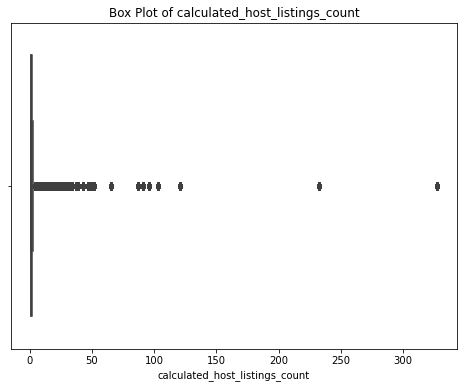

In [15]:
# Set the figure size
plt.figure(figsize=(8, 6))

# Plot a box plot
sns.boxplot(AirB['calculated_host_listings_count'])

# Add labels and title

plt.title('Box Plot of calculated_host_listings_count')

# Show the plot
plt.show()

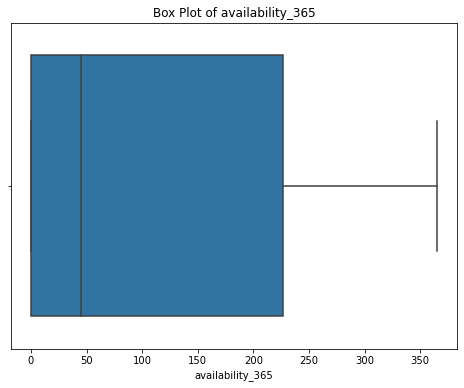

In [16]:
# Set the figure size
plt.figure(figsize=(8, 6))

# Plot a box plot
sns.boxplot(AirB['availability_365'])

# Add labels and title

plt.title('Box Plot of availability_365')

# Show the plot
plt.show()

# Capping (statistical) outliers

In [17]:
Q1 = AirB.price.quantile(0.10)

Q3 = AirB.price.quantile(0.90)

IQR = Q3 - Q1

AirB = AirB[(AirB.price >= Q1-1.5*IQR) & (AirB.price <= Q3 + 1.5*IQR)]
## For Price

In [18]:
Q1 = AirB.minimum_nights.quantile(0.10)

Q3 = AirB.minimum_nights.quantile(0.90)

IQR = Q3 - Q1

AirB = AirB[(AirB.minimum_nights >= Q1-1.5*IQR) & (AirB.minimum_nights <= Q3 + 1.5*IQR)]
## For minimum_nights

In [19]:
Q1 = AirB.number_of_reviews.quantile(0.10)

Q3 = AirB.number_of_reviews.quantile(0.90)

IQR = Q3 - Q1

AirB = AirB[(AirB.number_of_reviews >= Q1-1.5*IQR) & (AirB.number_of_reviews <= Q3 + 1.5*IQR)]
## For number_of_reviews

In [20]:
Q1 = AirB.reviews_per_month.quantile(0.10)

Q3 = AirB.reviews_per_month.quantile(0.90)

IQR = Q3 - Q1

AirB = AirB[(AirB.reviews_per_month >= Q1-1.5*IQR) & (AirB.reviews_per_month <= Q3 + 1.5*IQR)]
## For reviews_per_month

In [21]:
Q1 = AirB.calculated_host_listings_count.quantile(0.10)

Q3 = AirB.calculated_host_listings_count.quantile(0.90)

IQR = Q3 - Q1

AirB = AirB[(AirB.calculated_host_listings_count >= Q1-1.5*IQR) & (AirB.calculated_host_listings_count <= Q3 + 1.5*IQR)]
## For calculated_host_listings_count

## New spread of numerical columns:

In [30]:
Changed_Cols=["price","minimum_nights","number_of_reviews","reviews_per_month","calculated_host_listings_count"]

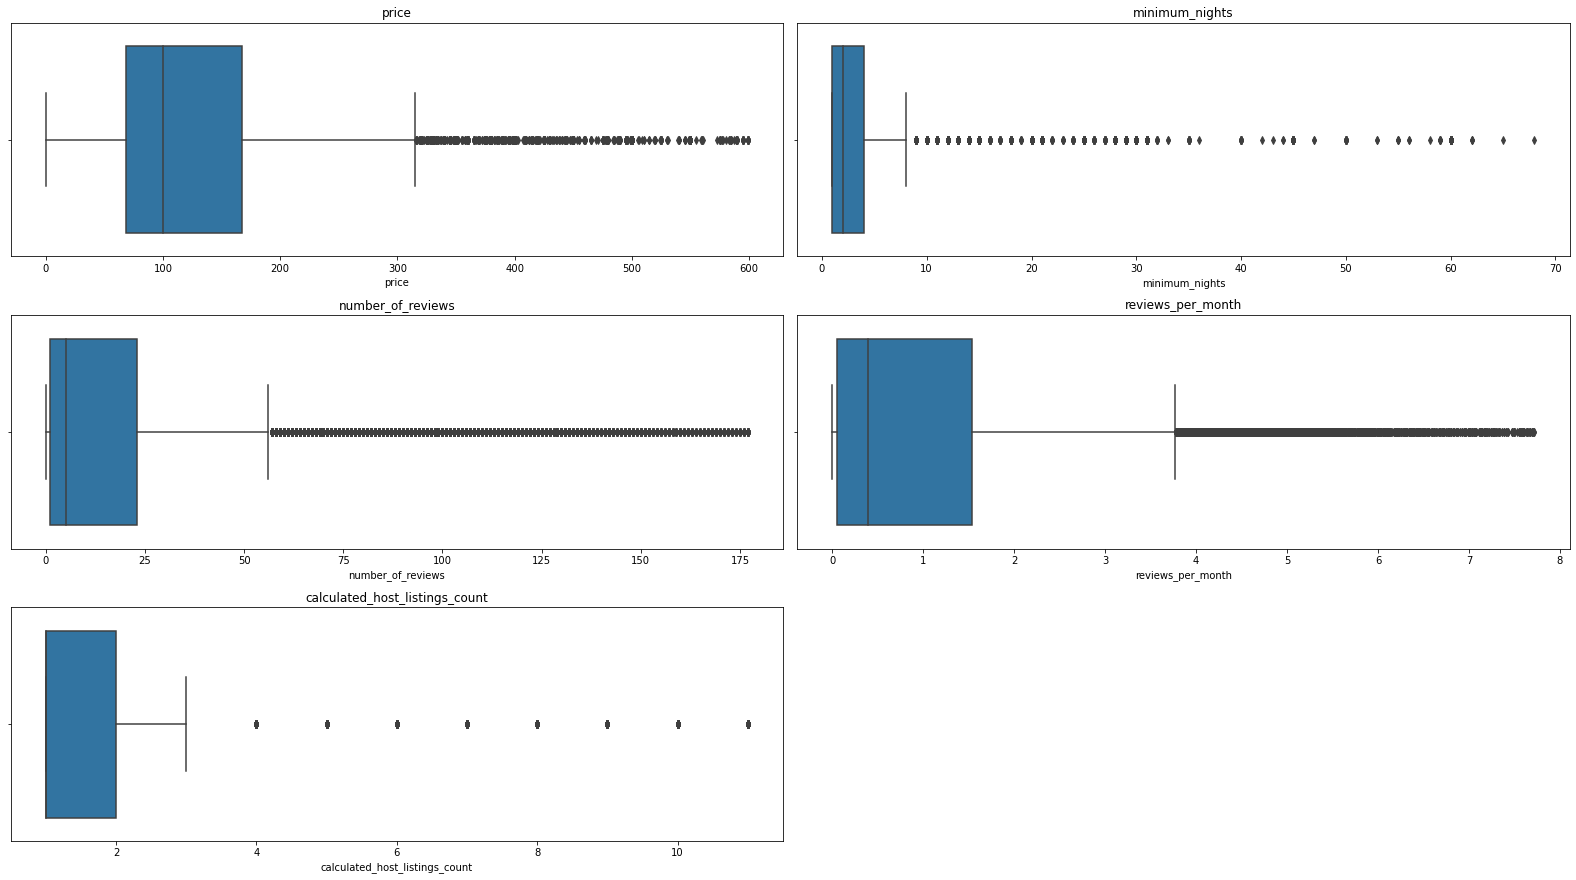

In [41]:
 # Set the figure size
plt.figure(figsize=(22,20))

for n,i in enumerate(Changed_Cols):
    
    plt.subplot(5,2,n+1)
    
    # Plot a box plot
    sns.boxplot(AirB[i],orient="h")

    # Add labels and title
    plt.title(i)
 

# Show the plot
plt.tight_layout()
plt.show()

In [46]:
AirB.calculated_host_listings_count.value_counts().head(10)

1     30949
2      6285
3      2700
4      1354
5       790
6       535
8       400
7       379
9       226
10      207
Name: calculated_host_listings_count, dtype: int64

In [47]:
AirB

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,19-10-2018,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,21-05-2019,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,0.00,1,365
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,19-11-2018,0.10,1,0
5,5099,Large Cozy 1 BR Apartment In Midtown East,7322,Chris,Manhattan,Murray Hill,40.74767,-73.97500,Entire home/apt,200,3,74,22-06-2019,0.59,1,129
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,NaN,0.00,2,9
48891,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,NaN,0.00,2,36
48892,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,NaN,0.00,1,27
48893,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,NaN,0.00,6,2


In [59]:
AirB.to_csv("Cleaned_AirBnb.csv",index=False)